In [2]:
# importiamo un database e svolgiamo una classificazione multipla
#Import the necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
 
# Load the wine dataset
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
  
# Train the model
clf = RandomForestClassifier(random_state=23)
clf.fit(X_train, y_train)
  
# Predict using the test data
y_pred = clf.predict(X_test)

# compute accuracy of the model
clf.score(X_test, y_test)


1.0

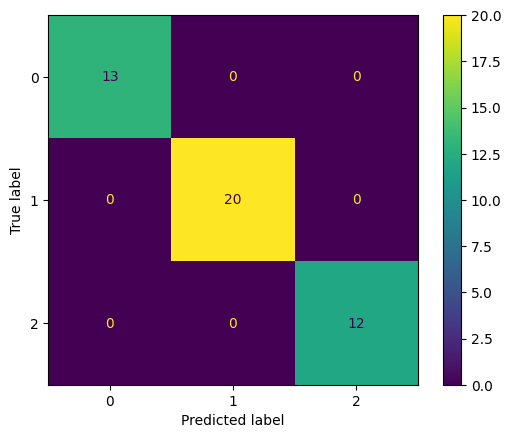

In [3]:
# Compute the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [7]:
# calcoliamo l'accuratezza
# (Vero positivo + Vero negativo) / Previsioni totali
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('accuratezza: ', accuracy)

# calcoliamo la precisione
# Vero positivo / (Vero positivo + Falso positivo)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, pos_label=None, average='weighted')
print('precisione: ', precision)

# calcoliamo la recall (sensitivity)
# Vero positivo / (Vero positivo + Falso negativo)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, pos_label=None, average='weighted')
print('recall: ', recall)

# calcoliamo la specificità
# Vero negativo / (Vero negativo + Falso positivo)
specificity = recall_score(y_test, y_pred, pos_label=None, average='weighted')
print('specificità: ', specificity)

# calcoliamo la F1 score
# 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, pos_label=None, average='weighted')
print('F1 score: ', f1)

# calcoliamo il coefficiente di correlazione Kappa di Cohen
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)

def kappa_to_text(kappa):
    if kappa < 0:
        text =  "non c'è concordanza"
    elif kappa >= 0 and kappa < 0.4:
        text = "la concordanza è scarsa"
    elif kappa >= 0.4 and kappa < 0.6:
        text = "la concordanza è discreta"
    elif kappa >= 0.6 and kappa < 0.8:
        text = "la concordanza è buona"
    elif kappa >= 0.8 and kappa <= 1:
        text = "la concordanza è ottima"
    else:
        text = "errore"
    
    return kappa, text

print('Kappa di Cohen: ', kappa_to_text(kappa))

# stampiamo tutte le metriche con il report di classificazione
from sklearn.metrics import classification_report
print('\nReport di classificazione: ')
print(classification_report(y_test, y_pred))

accuratezza:  1.0
precisione:  1.0
recall:  1.0
specificità:  1.0
F1 score:  1.0
Kappa di Cohen:  (1.0, 'la concordanza è ottima')

Report di classificazione: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

